<center><img src="img/aml-logo.png" width="600"/>

***

<center>Lecture 10</center>

***

<center>Dimensionality Reduction <br> + <br>Clustering<br> + <br>Outlier Detection</center>

***

<center>15 April 2021<center>
<center>Rahman Peimankar<center>

# Agenda
1. Dimensionality Reduction
    * Principal Component Analysis (PCA) 
    * sklearn implementation
2. Clustering
    * K-Means Clustering
3. Outlier/Novelty Detection
    * One-Class SVM
    * Isolation Forests

# Recap of Last Week

# Feature Selection

* Different Feature Selection Methods
    1. Filter methods 
        * Correlation Coefficient
        * Chi-square Test
        * Variance Threshold
    2. Wrapper methods 
        * Forward Feature Selection
        * Backward Feature Elimination
        * Exhaustive Feature Selection
        * Recursive Feature Elimination
    3. Embedded methods
        * Random Forest Importance
       

<font size="25"><center>Dimensionality Reduction

# Principal Component Analysis (PCA)

* We are going to go through PCA using Singular Value Decomposition (SVD).
* You will learn what PCA does, how it does it, and how to use it to get deeper insidet into your data.

Let's start with a simple data:

<div>
<center>
<img src="img/Qimage-1.JPG" width="550"/>
</div>

If we only measure 1 gene, we can plot the data on a number line:

<div>
<center>
<img src="img/Qimage-2.JPG" width="550"/>
</div>

Even though it is a simple graph, it shows us that mice 1, 2 and 3 are more similar to each other than they are to mice 4, 5 and 6. 

If we measure 2 genes, then we can plot the data on a 2-D x-y graph!

<div>
<center>
<img src="img/Qimage-3.JPG" width="350"/>
</div>

* We can see that mice 1, 2 and 3 cluster on the right side.
* And mice 4, 5 and 6 cluster on the lower left side.

If we measured 3 genes, we would add another axis to the graph and make it look 3-D.

<div>
<center>
<img src="img/Qimage-4.JPG" width="950"/>
</div>

* The smaller dots have larger values for Gene 3 and are "further away".
* The larger dots have smaller values for Gene 3 and are "closer".

If we measure 4 genes, however, we can no longer plot the data - 4 genes require 4 dimensions.

<div>
<center>
<img src="img/Qimage-5.JPG" width="550"/>
</div>

1. So, we are going to talk about how PCA can take 4 or more gene measurements (and thus, 4 or more dimensions), and make a 2-D PCA plot.

2. We will also talk about how PCA can tell us which gene (or variable) is the most valuable for clustering the data.

3. Lastly, we will talk about how PCA can tell us how accurate the 2-D graph is.

Let's go back to the datset that only had 2 genes:

<div>
<center>
<img src="img/Qimage-6.JPG" width="850"/>
</div>

We will calculate the average measurement for Gene 1:

<div>
<center>
<img src="img/Qimage-7.JPG" width="850"/>
</div>


And the average measurement for Gene 2:
    
<div>
<center>
<img src="img/Qimage-8.JPG" width="850"/>
</div>

With the average values, we can calculate the center of the data.

<div>
<center>
<img src="img/Qimage-9.JPG" width="450"/>
</div>

**From this point on, we will focus on what happens in the graph and we no longer need the original data.**

<div>
<center>
<img src="img/Qimage-10.JPG" width="450"/>
</div>

* Now we shift the data that the **center** is on top of the **origin (0,0)** in the graph. 

<div>
<center>
<img src="img/Qimage-11.JPG" width="450"/>
</div>
    
**NOTE**: Shifting the data did not change how the data points are positioned **relative to each other**. For example, the highest point is still the highest point in the shifted data!

Now let's fit a line to the data:
* We start by fitting random lines that go through the origin and rotate the lines to find the best fitted line.
* The below line fits best.

<div>
<center>
<img src="img/Qimage-12.JPG" width="650"/>
</div>

**BUT**: First we need to talk about how PCA decides if a fit is good or not?

Let's go back and fit a **random line that goes through origin**:

* To quantify how good this line fits the data, PCA projects the data onto it.

<div>
<center>
<img src="img/Qimage-13.JPG" width="550"/>
</div>
    

1. It can either measure the distances from the data to the line and try to find the line that **minimizes** those distances, or
2. it can try to find the line that **maximizes** the distances from the projected points to the origin.

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-14.JPG" width="900"/>
    
</td>
<td>
    
<img src="img/Qimage-15.JPG" width="900"/>
    
</td>
<td>
    
<img src="img/Qimage-16.JPG" width="900"/>
    
</td>
</tr></table>

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-17.JPG" width="900"/>
    
</td>
<td>
    
<img src="img/Qimage-18.JPG" width="900"/>
    
</td>
<td>
    
<img src="img/Qimage-19.JPG" width="900"/>
    
</td>
</tr></table>

We measure the distances from the points to the origin: $d_1, d_2, d_3, d_4, d_5, d_6$ 

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-20.JPG" width="700"/>
    
</td>
<td>
    
<img src="img/Qimage-21.JPG" width="700"/>
    
</td>
<td>
    
<img src="img/Qimage-22.JPG" width="700"/>
    
</td>
</tr></table>

* We square the distances so that negative values do not cancel out positive values.
* Then we sum up all these squared distances.
* This is called *sum of squared distances*

$d_1^2 + d_2^2 + d_3^2 + d_4^2 + d_5^2 + d_6^2 =$ sum of squared distances = SS(distances)

* We repeat this process by rotating the line and calculate the *sum of squared distances* for the new line.
* The line that has the largest *sum of squared distances* between the projected points and the origin is the *best* fitted line.

Ultimately, we end up with this line. It has the largest SS(distances).

<div>
<center>
<img src="img/Qimage-23.JPG" width="550"/>
</div>

* This line is called **Principal Component 1** (**PC1** for short).
* PC1 has a slope of 0.25.
* In other words, for every **4** units that we go out along the Gene 1 axis, we go up **1** unit along the Gene 2 axis.
* That means that the data are mostly spread out along the Gene 1 axis. And only a little bit spread out along the Gene 2 axis.

<div>
<center>
<img src="img/Qimage-24.JPG" width="550"/>
</div>
    
**NOTE**: To make PC1, we need to mix **4** parts of Gene 1 with **1** parts of Gene 2. This is called *linear combination* of Genes 1 and 2.

<div>
<center>
<img src="img/Qimage-25.JPG" width="550"/>
</div>

When you do PCA with SVD, the PC1 is scaled so that the length of the red line is equal to **1**.

So, all we have to do to scale the triangle so that the red line is 1 unit long is to divide each side by **4.12**.

<div>
<center>
<img src="img/Qimage-26.JPG" width="550"/>
</div>

* The new values change our recipe and to make **PC1** we should mix:
    1. **0.97** parts of Gene 1 with
    2. **0.242** parts of Gene 2.
    
**BUT**, the ratio is the same: we will use 4 times as much Gene 1 as Gene 2. 

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-27.JPG" width="500"/>
    
</td>
<td>
    
<img src="img/Qimage-28.JPG" width="560"/>
    
</td>
</tr></table>
    
* This 1 unit long vector, consisiting of **0.97** parts Gene 1 and **0.242** parts Gene 2, is called the **Singular Vector** or the **Eigenvector** for **PC1**.
* The proportions of each gene are called **Loading Scores**.
* Also, PCA calls the SS(distances) for the best fitted line the **Eigenvalue for PC1**! And the square root of the **Eigenvalue for PC1** is called the **Singular Value for PC1**.
    
SS(distances for PC1) = Eigenvalue for PC1
    
$\sqrt{\text{Eigenvalue for PC1}}$ = Singular Value for PC1

Now, let's work on **PC2**!

* Because this is only a 2-D graph, **PC2** is simply the line through the origin that is prependicular to **PC1**, without any further optimization that has to be done.
* And, this means that the recipe for PC2 is **-1** parts Gene 1 and **4** parts Gene 2. If we scale everything so that get a unit vector, the recipe is **-0.242** parts Gene 1 and **0.97** parts Gene 2.
* Lastly, the **Eigenvalue for PC2** is the SS(distances) between the projected points and the origin.

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-29.JPG" width="510"/>
    
</td>
<td>
    
<img src="img/Qimage-30.JPG" width="500"/>
    
</td>
<td>
    
<img src="img/Qimage-31.JPG" width="530"/>
    
</td>
</tr></table>

To draw the final PCA plot, we simply rotate everything so that PC1 is horizontal!

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-32.JPG" width="570"/>
    
</td>
<td>
    
<img src="img/Qimage-33.JPG" width="500"/>
    
</td>
</tr></table>

* Then we use the projected points to find where the samples go in the PCA plot.
* For example, these projected points correspond the sample 6.

<div>
<center>
<img src="img/Qimage-34.JPG" width="400"/>
</div>
    
And samples 1 and 2 go here and so on.
    
<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-35.JPG" width="320"/>
    
</td>
<td>
    
<img src="img/Qimage-36.JPG" width="390"/>
    
</td>
<td>
    
<img src="img/Qimage-37.JPG" width="390"/>
    
</td>
</tr></table>
    
**This is how PCA is done using SVD.**

**One last thing!**

Remember the eigenvalues?

SS(distances for PC1) = Eigenvalue for PC1

SS(distances for PC2) = Eigenvalue for PC2

We got those by
1. pojecting the data onto the principal components,
2. measuring the distances to the origin, and 
3. then squaring and adding them together.

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-38.JPG" width="300"/>
    
</td>
<td>
    
<img src="img/Qimage-39.JPG" width="300"/>
    
</td>
</tr></table>

We can convert them into variation around the origin (0,0) by dividing by the sample size minus 1 (i.e. *n-1*).

$\frac{\text{Eigenvalue for PC1}}{n-1}$ = Variation for PC1

$\frac{\text{Eigenvalue for PC2}}{n-1}$ = Variation for PC2

* For example, imagine that the variation for **PC1 = 15** and for **PC2 = 3**.
* That means that the total variation around both PCs is **15 + 3 = 18**.
* Consequently, PC1 accounts for **15/18 = 0.83 = 83%** of the total variation and PC2 accounts for **3/18 = 0.17 = 17%** of the total variation.

<div>
<center>
<img src="img/Qimage-40.JPG" width="400"/>
</div>

**Note**: A **Scree Plot** is a graphical representation of the percentages of variation that each PC accounts for.

<div>
<center>
<img src="img/Qimage-41.JPG" width="200"/>
</div>

## What if we had more than 2 Genes?

<div>
<center>
<img src="img/Qimage-42.JPG" width="500"/>
</div>

## What if we have 4-D data or 4 Genes?

<div>
<center>
<img src="img/Qimage-43.JPG" width="400"/>
</div>

## What if we get a scree plot like below?

<div>
<center>
<img src="img/Qimage-44.JPG" width="400"/>
</div>

## Practical Tips on PCA


### 1. Scaling your data

<div>
<center>
<img src="img/Qimage-45.JPG" width="700"/>
</div>

* Math scores are between 0 and 100 and they are spread out in the graph.
* In contrast, reading scores are only from 0 to 10 and they are squeezed on the graph.


If we centered the data and did PCA on it, we get this recipe for PC1:
* To make PC1: Mix **0.99** parts math with **0.1** parts reading.
* It suggests that Math is 10 times better than Reading for capturing variation. 

This is only because the math scores are on a scale **10 times larger** than the scale for reading scores.

<div>
<center>
<img src="img/Qimage-46.JPG" width="700"/>
</div>

If we divided the math scoes by 10 and replotted:

<div>
<center>
<img src="img/Qimage-47.JPG" width="700"/>
</div>

And if we centered the data and did PCA on it, we would get this recipe for PC1:
* To make PC1: Mix 0.77 parts math with 0.77 parts reading.
* This suggest that Reading and Math are equally good at capturing variation. 

<div>
<center>
<img src="img/Qimage-48.JPG" width="400"/>
</div>

**Note**: You need to make sure that the scales for each variable (in this case, math and reading scores) are roughly equivalent, otherwise you will be biased towards one of them.

**The standard practice is to divide each variable by its standard deviation.**

### 2. How many principal components you should expect to get?

* In the previous example, we found 2 PCs.
* And we did not asked if there were any more PCs.

<div>
<center>
<img src="img/Qimage-48.JPG" width="400"/>
</div>
    
**Is there a 3rd PC? Or can we find a line prependicular to both PC1 and PC2?**

## What if both math and reading scores are 100% correlated? 

<div>
<center>
<img src="img/Qimage-49.JPG" width="500"/>
</div>
    

* We center the data 
* Then we found the best fitting line (PC1)
* Technically speaking, we could find a line prependicular to PC1

<div>
<center>
<img src="img/Qimage-50.JPG" width="500"/>
</div>

## What if we had only two students?

<div>
<center>
<img src="img/Qimage-51.JPG" width="500"/>
</div>

* We center the data 
* Then we found the best fitting line (PC1)
* Technically speaking, we could find a line prependicular to PC1

<div>
<center>
<img src="img/Qimage-52.JPG" width="500"/>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
# cancer.feature_names

In [2]:
print(cancer.data.shape)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cancer.data)
print(pca_transformed.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'PC2')

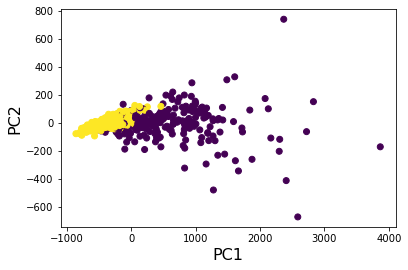

In [3]:
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=cancer.target)
plt.xlabel("PC1", fontsize=16)
plt.ylabel("PC2", fontsize=16)

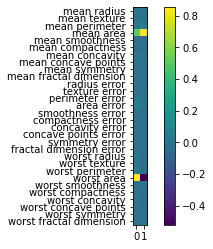

In [4]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()

Text(0, 0.5, 'PC2')

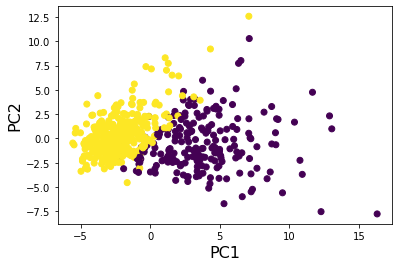

In [5]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_transformed_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(pca_transformed_scaled[:, 0], pca_transformed_scaled[:, 1], c=cancer.target)
plt.xlabel("PC1", fontsize=16)
plt.ylabel("PC2", fontsize=16)

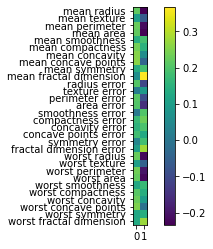

In [6]:
components_scaled = pca_scaled.named_steps['pca'].components_
plt.imshow(components_scaled.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()

Text(0, 0.5, 'PC2')

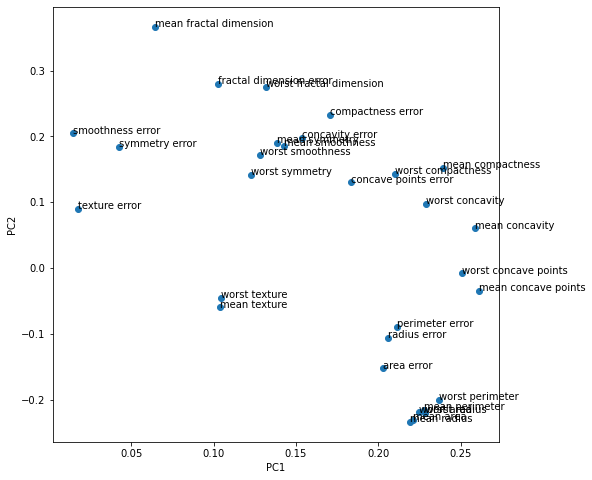

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(components_scaled[0], components_scaled[1])
for num, pcas in enumerate(components_scaled.T):
    plt.annotate(cancer.feature_names[num], pcas)
plt.xlabel("PC1")
plt.ylabel("PC2")

<font size="25"><center>Clustering

<div>
<center>
<img src="img/Qimage-53.JPG" width="400"/>
</div>

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-54.JPG" width="500"/>
    
</td>
<td>
    
<img src="img/Qimage-55.JPG" width="500"/>
    
</td>
</tr></table>

* Partition data into groups (clusters)
* Points within a cluster should be “similar”.
* Points in different cluster should be “different”.

## Whait if you misspecify the number of groups?

<div>
<center>
<img src="img/Qimage-56.JPG" width="400"/>
</div>

## Goals of Clustering

1. Data Exploration
    * Are there coherent groups ?
    * How many groups are there ?

2. Data Partitioning
    * Divide data by group before further processing

3. Unsupervised feature extraction
    * Derive features from clusters or cluster distances

4. Evaluation and parameter tuning
    * Quantitative measures of limited use
    * Usually qualitative measures used
    * Best: downstream tasks
    * What is your goal?

# K-Means Clustering

Imagine you had some data that you could plot on a line, and you knew you needed to put it into 3 clusters.

<div>
<center>
<img src="img/Qimage-57.JPG" width="800"/>
</div>

* In this case the data make three, relatively obvious, clusters.
* But, rather that rely on our eye, let's see if we can get a computer to identify the same 3 clusters.
* To do this, we use K-means clustering.

<div>
<center>
<img src="img/Qimage-58.JPG" width="800"/>
</div>

#### Step 1: Select the number of clusters

In our case we will select K=3.
**Note**: There is a better way to select K and we will talk about it later.

#### Step 2: Randomly select 3 distict data points.

<div>
<center>
<img src="img/Qimage-59.JPG" width="800"/>
</div>

#### Step 3: Measure the distance between the 1st point and the three intial clusters 

<div>
<center>
<img src="img/Qimage-60.JPG" width="800"/>
</div>

#### Step 4: Assign the 1st point to the nearest cluster. 
In this case, the nearest cluster is the <font color='blue'>blue <font color='black'> cluster.
<div>
<center>
<img src="img/Qimage-61.JPG" width="800"/>
</div>

Now, we do the same thing for the next point:
1. Measure the distances 
2. Assign the point to the nearest cluster

<div>
<center>
<img src="img/Qimage-62.JPG" width="800"/>
</div>

* This process will be repeated for the other points. 
* The rest of these points are closest to the <font color='orange'>orange <font color='black'> cluster.  
    
<div>
<center>
<img src="img/Qimage-63.JPG" width="800"/>
</div>

#### Step 5: Calculate the mean of each cluster.

<div>
<center>
<img src="img/Qimage-64.JPG" width="800"/>
</div>

Now, we repeat what we just did:
* Measure and cluster using the mean values! 

<div>
<center>
<img src="img/Qimage-65.JPG" width="800"/>
</div>

<div>
<center>
<img src="img/Qimage-66.JPG" width="800"/>
</div>

<div>
<center>
<img src="img/Qimage-67.JPG" width="800"/>
</div>

<div>
<center>
<img src="img/Qimage-68.JPG" width="800"/>
</div>

<div>
<center>
<img src="img/Qimage-69.JPG" width="800"/>
</div>

<div>
<center>
<img src="img/Qimage-70.JPG" width="800"/>
</div>

### Is it a good clustering result?

* We can assess the quality of the clustering by adding up the variation within each cluster.
* And looking at the **total variation** within the clusters.

<div>
<center>
<img src="img/Qimage-71.JPG" width="800"/>
</div>

* This is the only option to keep track of these clusters, and their total variance, and do the whole thing over again with fdifferent starting points

Let's go back to the beginning:
1. Pick 3 initial clusters (points):
<div>
<center>
<img src="img/Qimage-72.JPG" width="800"/>
</div>

2. Clusters all the remaining points:
<div>
<center>
<img src="img/Qimage-73.JPG" width="800"/>
</div>

3. Calculate the mean of each cluster: 
<div>
<center>
<img src="img/Qimage-74.JPG" width="800"/>
</div>

4. Recluster based on the new means:
<div>
<center>
<img src="img/Qimage-75.JPG" width="800"/>
</div>    

5. It repeats until the clusters no longer change:

<div>
<center>
<img src="img/Qimage-76.JPG" width="780"/>
</div

6. Calculate the **total variation**:

<div>
<center>
<img src="img/Qimage-77.JPG" width="800"/>
</div

And then do it all again:

<div>
<center>
<img src="img/Qimage-78.JPG" width="800"/>
</div

At this point, K-means clustering knows that the 2nd clustering is the best clustering so far. But, it does not know if it is the best overall, so it will do a few more clusters (as many as you tell it) and then come back and return the best one.

## Question

How do you figure out what value to use for *K*?


<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-79.JPG" width="800"/>
    
</td>
<td>
    
<img src="img/Qimage-80.JPG" width="800"/>
    
</td>
<td>
    
<img src="img/Qimage-81.JPG" width="800"/>
    
</td>    
</tr></table>

<div>
<center>
<img src="img/Qimage-82.JPG" width="600"/>
</div

* K=1 is the worst case scenario. We can quantify its badness ith the total variation.
* K=2 is better, and we can quantify how much better by comparing the total variation within the 2 clusters to K=1.
* K=3 is even better!  

* But, wait! K=4 is better than K=3 when we look at the total variation!

<div>
<center>
<img src="img/Qimage-83.JPG" width="600"/>
</div

* Each time we add a new cluster, the total variation within each cluster is smaller than before.
* And when there is only one point per cluster, the variation=0!

If we plot the reduction in variation per value K, there is huge reduction in variation with K=3, but after that, the variation does not go down as quickly.

<div>
<center>
<img src="img/Qimage-84.JPG" width="600"/>
</div

## What if our data is 2-D?

<div>
<center>
<img src="img/Qimage-85.JPG" width="600"/>
</div

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(centers=3, random_state=1)
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(X)

print(k_means.cluster_centers_.shape)
print(k_means.labels_.shape)
print(k_means.predict(X).shape)

(4, 2)
(100,)
(100,)


In [9]:
def scatter_plt(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)

([], <a list of 0 Text major ticklabel objects>)

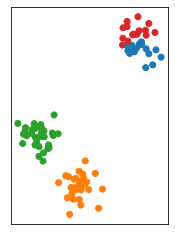

In [10]:
scatter_plt(X[:, 0], X[:, 1], c=k_means.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

# Let's Find The Elbow Point

In [11]:
K = range(1, 8)
inertia = []

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertia.append(k_means.inertia_)

C:\Users\abpe\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


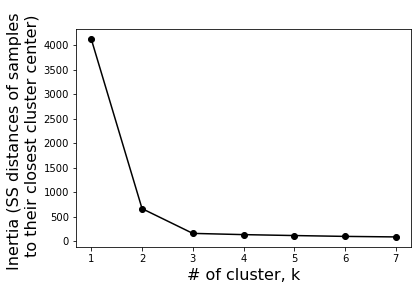

In [12]:
plt.plot(K, inertia, '-o', color='black')
plt.xlabel('# of cluster, k', fontsize=16)
plt.ylabel('Inertia (SS distances of samples \n to their closest cluster center)', fontsize=16)
plt.xticks(K)
plt.show()

# Other Clustering Algorithms

If you are interested in learning more about other clustering algorithms, please see link below:

* Agglomerative (Hierarchical) Clustering

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* DBSCAN - Density-Based Spatial Clustering of Applications with Noise

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)


<font size="25"><center>Outlier/Novelty Detection

# Motivation

<div>
<center>
<table><tr>
<td>
    
<img src="img/Qimage-86.JPG" width="520"/>
    
</td>
<td>
    
<img src="img/Qimage-87.JPG" width="500"/>
    
</td>
</tr></table>

# Applications

* Fraud detection (credit cards, click fraud, ...)

* Network failure detection

* Intrusion detection in networks

* Defect detection (engineering etc…)

* News? Intelligence?

# Basic idea

* Model data distribution p(X)
* Outlier: p(X)<ε

# 1. One-Class SVM

* An unsupervised outlier detection.
* Only select support vectors (not all points)
* Specify outlier ratio (contamination) via nu
* Very efficient for high-dimensional data
https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

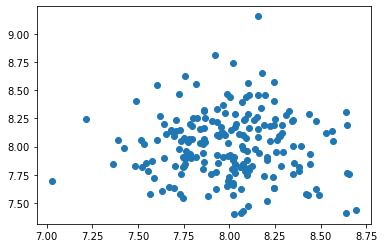

In [13]:
X, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8), random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [16]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
svm.fit(X)
pred = svm.predict(X)

from numpy import where
anomaly_index = where(pred==-1)
anomalies = X[anomaly_index]

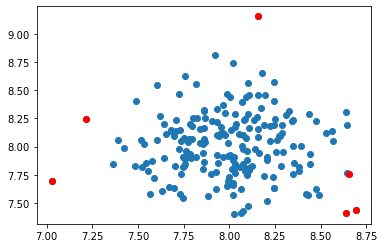

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color='r')
plt.show()

# 2. Isolation Forests

* It identifies anomalies by isolating outliers in the data.
* It detects anomalies faster and also requires less memory compared to other anomaly detection algorithms.
* Isolation forest works on the principle of the decision tree algorithm.

<div>
<center>
<img src="img/Qimage-88.JPG" width="500"/>
</div

<div>
<center>
<img src="img/Qimage-89.JPG" width="800"/>
</div

## Comparison Between Isolation Forests and One-Class SVM

<div>
<center>
<img src="img/Qimage-90.JPG" width="500"/>
</div

PyOD library:

https://pyod.readthedocs.io/en/latest/#

# It Is Your Turn
### Plese implement Isolation Forests similar to One-Class SVM!

In [ ]:
# YOUR CODE HERE


<font size="25"><center>Thank you!